## Project: Titanic Survival Prediction Using Machine Learning

### This project aims to develop a machine learning model capable of predicting whether a passenger aboard the Titanic would have survived the disaster. 

### This project uses historical data of titanic containg the feature PassengerId, Survived, Pclass,Name,sex,age,parch etc


## Objective : 
### Develop a machine learning model that predicts whether a Titanic passenger would have survived or not

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic_df=pd.read_csv("./titanic_train.csv")

In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Information about dataset

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratary Data Analysis 

In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Understand how many passenger are male and how many are female

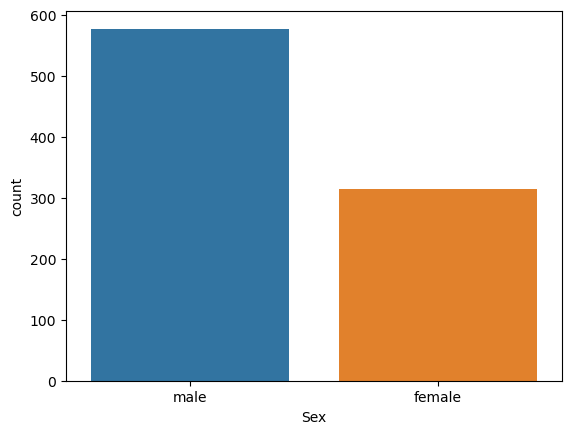

In [9]:
sns.countplot(x='Sex',data=titanic_df)
plt.show()

In [ ]:
# Understand how many passenger with different classes

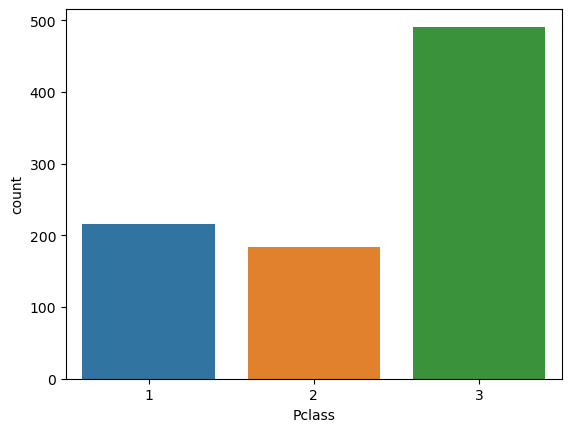

In [10]:
sns.countplot(x='Pclass',data=titanic_df)
plt.show()

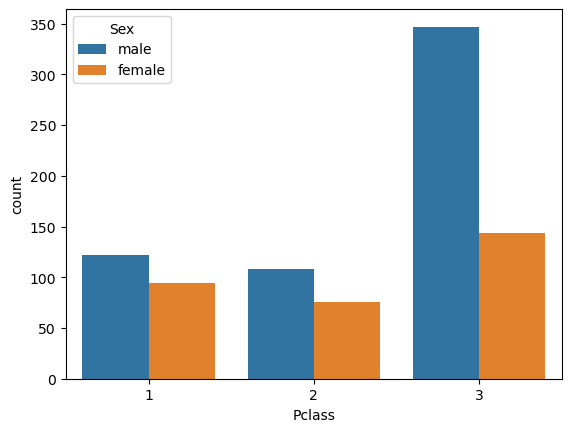

In [11]:
sns.countplot(x='Pclass',data=titanic_df,hue="Sex")
plt.show()

In [12]:
# Understanding the Age Variable

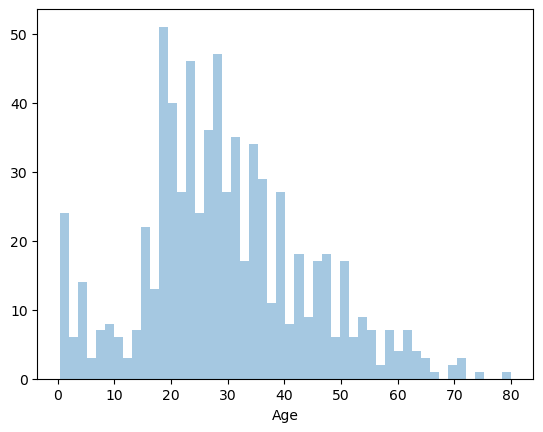

In [13]:
sns.distplot(titanic_df['Age'],kde=False,bins=50)
plt.show()

In [14]:
titanic_df['Along']=titanic_df['SibSp']+titanic_df['Parch']

In [15]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [16]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [17]:
titanic_df['Along'].loc[titanic_df['Along']>0]=1

In [18]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


## Factor to Survive

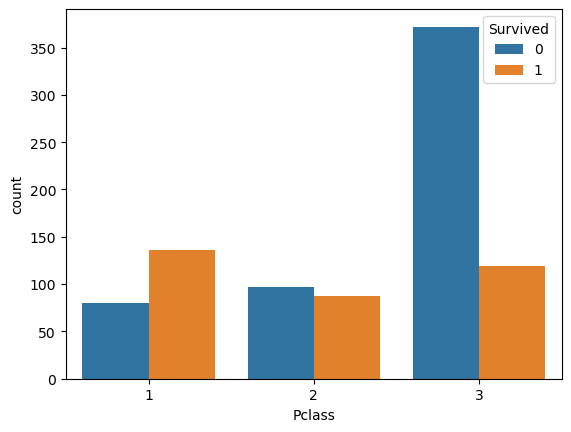

In [19]:
sns.countplot(x='Pclass',data=titanic_df,hue='Survived')
plt.show()

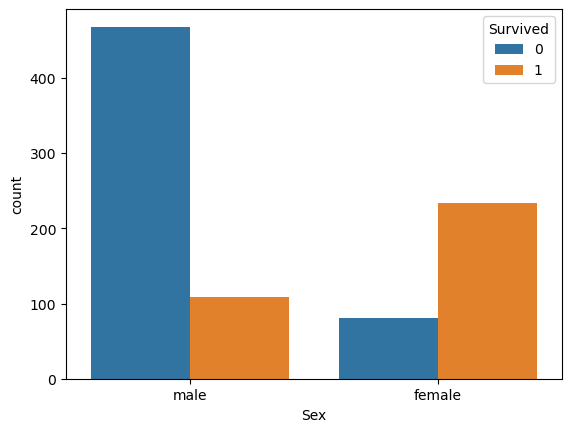

In [20]:
sns.countplot(x='Sex',data=titanic_df,hue='Survived')
plt.show()

## Data Preparation

In [21]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
titanic_df=titanic_df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])

In [23]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


In [24]:
titanic_df['Sex']=np.where(titanic_df['Sex']=='male',1,0)

In [25]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


In [26]:
# Checking the correlation of variable

<Axes: >

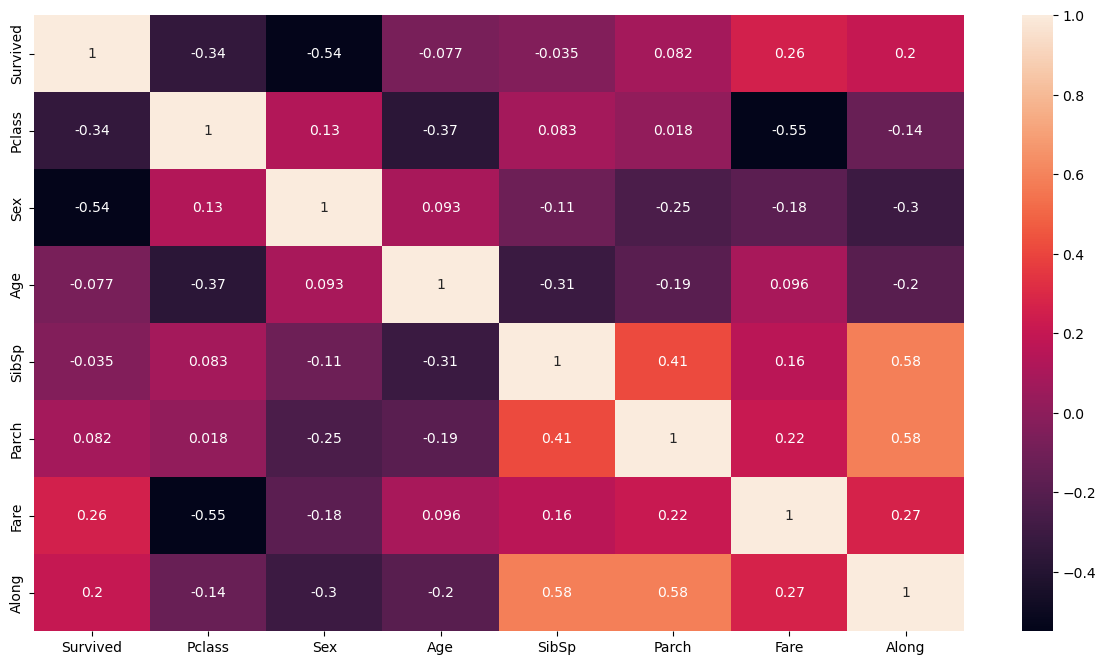

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(titanic_df.corr(),annot=True)

## Handling Missing Values 

In [29]:
titanic_df.isnull().sum()/len(titanic_df)*100

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
SibSp        0.00000
Parch        0.00000
Fare         0.00000
Along        0.00000
dtype: float64

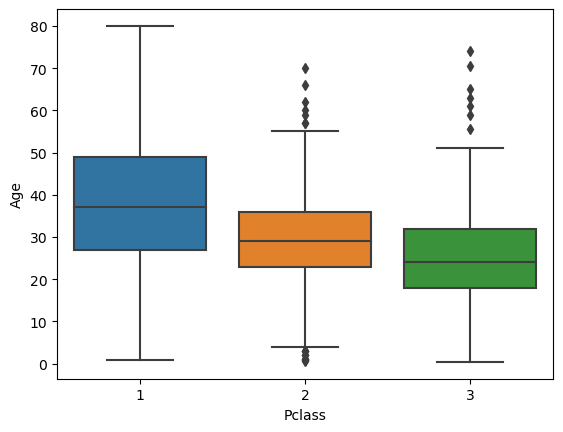

In [34]:
sns.boxplot(x='Pclass',y='Age',data=titanic_df)
plt.show()

In [37]:
titanic_df[titanic_df['Pclass']==1]['Age'].mean()

38.233440860215055

In [50]:
def fill_age(row):
    print(row)
    print()
   
    


In [51]:
titanic_df[['Age','Pclass']].apply(fill_age,axis=1)     # axis = 1 means row wise

Age       22.0
Pclass     3.0
Name: 0, dtype: float64

Age       38.0
Pclass     1.0
Name: 1, dtype: float64

Age       26.0
Pclass     3.0
Name: 2, dtype: float64

Age       35.0
Pclass     1.0
Name: 3, dtype: float64

Age       35.0
Pclass     3.0
Name: 4, dtype: float64

Age       NaN
Pclass    3.0
Name: 5, dtype: float64

Age       54.0
Pclass     1.0
Name: 6, dtype: float64

Age       2.0
Pclass    3.0
Name: 7, dtype: float64

Age       27.0
Pclass     3.0
Name: 8, dtype: float64

Age       14.0
Pclass     2.0
Name: 9, dtype: float64

Age       4.0
Pclass    3.0
Name: 10, dtype: float64

Age       58.0
Pclass     1.0
Name: 11, dtype: float64

Age       20.0
Pclass     3.0
Name: 12, dtype: float64

Age       39.0
Pclass     3.0
Name: 13, dtype: float64

Age       14.0
Pclass     3.0
Name: 14, dtype: float64

Age       55.0
Pclass     2.0
Name: 15, dtype: float64

Age       2.0
Pclass    3.0
Name: 16, dtype: float64

Age       NaN
Pclass    2.0
Name: 17, dtype: float64

Age       31

0      None
1      None
2      None
3      None
4      None
       ... 
886    None
887    None
888    None
889    None
890    None
Length: 891, dtype: object

In [56]:
def fill_age1(row):
    age=row[0]
    pclass=row[1]
    
    print(age,pclass)
    print()

   

In [57]:
titanic_df[['Age','Pclass']].apply(fill_age1,axis=1) 

22.0 3.0

38.0 1.0

26.0 3.0

35.0 1.0

35.0 3.0

nan 3.0

54.0 1.0

2.0 3.0

27.0 3.0

14.0 2.0

4.0 3.0

58.0 1.0

20.0 3.0

39.0 3.0

14.0 3.0

55.0 2.0

2.0 3.0

nan 2.0

31.0 3.0

nan 3.0

35.0 2.0

34.0 2.0

15.0 3.0

28.0 1.0

8.0 3.0

38.0 3.0

nan 3.0

19.0 1.0

nan 3.0

nan 3.0

40.0 1.0

nan 1.0

nan 3.0

66.0 2.0

28.0 1.0

42.0 1.0

nan 3.0

21.0 3.0

18.0 3.0

14.0 3.0

40.0 3.0

27.0 2.0

nan 3.0

3.0 2.0

19.0 3.0

nan 3.0

nan 3.0

nan 3.0

nan 3.0

18.0 3.0

7.0 3.0

21.0 3.0

49.0 1.0

29.0 2.0

65.0 1.0

nan 1.0

21.0 2.0

28.5 3.0

5.0 2.0

11.0 3.0

22.0 3.0

38.0 1.0

45.0 1.0

4.0 3.0

nan 1.0

nan 3.0

29.0 2.0

19.0 3.0

17.0 3.0

26.0 3.0

32.0 2.0

16.0 3.0

21.0 2.0

26.0 3.0

32.0 3.0

25.0 3.0

nan 3.0

nan 3.0

0.83 2.0

30.0 3.0

22.0 3.0

29.0 3.0

nan 3.0

28.0 1.0

17.0 2.0

33.0 3.0

16.0 3.0

nan 3.0

23.0 1.0

24.0 3.0

29.0 3.0

20.0 3.0

46.0 1.0

26.0 3.0

59.0 3.0

nan 3.0

71.0 1.0

23.0 1.0

34.0 2.0

34.0 2.0

28.0 3.0

nan 3.0

21.0 1.0

3

0      None
1      None
2      None
3      None
4      None
       ... 
886    None
887    None
888    None
889    None
890    None
Length: 891, dtype: object

In [58]:
def fill_age1(row):
    age=row[0]
    pclass=row[1]
    
    if pd.isnull(age):
        if pclass==1:
            return titanic_df[titanic_df['Pclass']==1]['Age'].mean()
        elif pclass==2:
            return titanic_df[titanic_df['Pclass']==2]['Age'].mean()
        else:
            return titanic_df[titanic_df['Pclass']==3]['Age'].mean()
        
    else:
        return age

In [60]:
titanic_df['Age']=titanic_df[['Age','Pclass']].apply(fill_age1,axis=1)

In [61]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Along       0
dtype: int64

## Model Building

In [62]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,1,22.00000,1,0,7.2500,1
1,1,1,0,38.00000,1,0,71.2833,1
2,1,3,0,26.00000,0,0,7.9250,0
3,1,1,0,35.00000,1,0,53.1000,1
4,0,3,1,35.00000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.00000,0,0,13.0000,0
887,1,1,0,19.00000,0,0,30.0000,0
888,0,3,0,25.14062,1,2,23.4500,1
889,1,1,1,26.00000,0,0,30.0000,0


In [64]:
# Splitting data into X and y variable

X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [67]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,3,1,22.00000,1,0,7.2500,1
1,1,0,38.00000,1,0,71.2833,1
2,3,0,26.00000,0,0,7.9250,0
3,1,0,35.00000,1,0,53.1000,1
4,3,1,35.00000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.00000,0,0,13.0000,0
887,1,0,19.00000,0,0,30.0000,0
888,3,0,25.14062,1,2,23.4500,1
889,1,1,26.00000,0,0,30.0000,0


In [69]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [72]:
X_train.shape,X_test.shape

((712, 7), (179, 7))

In [ ]:
# Import Decision tree classifier model

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
model=DecisionTreeClassifier(criterion='entropy',max_depth = 3)

In [97]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [98]:
y_pred = model.predict(X_test)

In [99]:
model.score(X_train,y_train)

0.8342696629213483

In [100]:
model.score(X_test,y_test)

0.8212290502793296

In [101]:
from sklearn.metrics import classification_report,f1_score

In [ ]:
print(classification_report(y_test,y_pred))

In [103]:
f1_score(y_test,y_pred)

0.7611940298507462

## Visualizing the Tree 

In [104]:
from sklearn import tree

In [108]:
features = X.columns

In [109]:
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Along'], dtype='object')

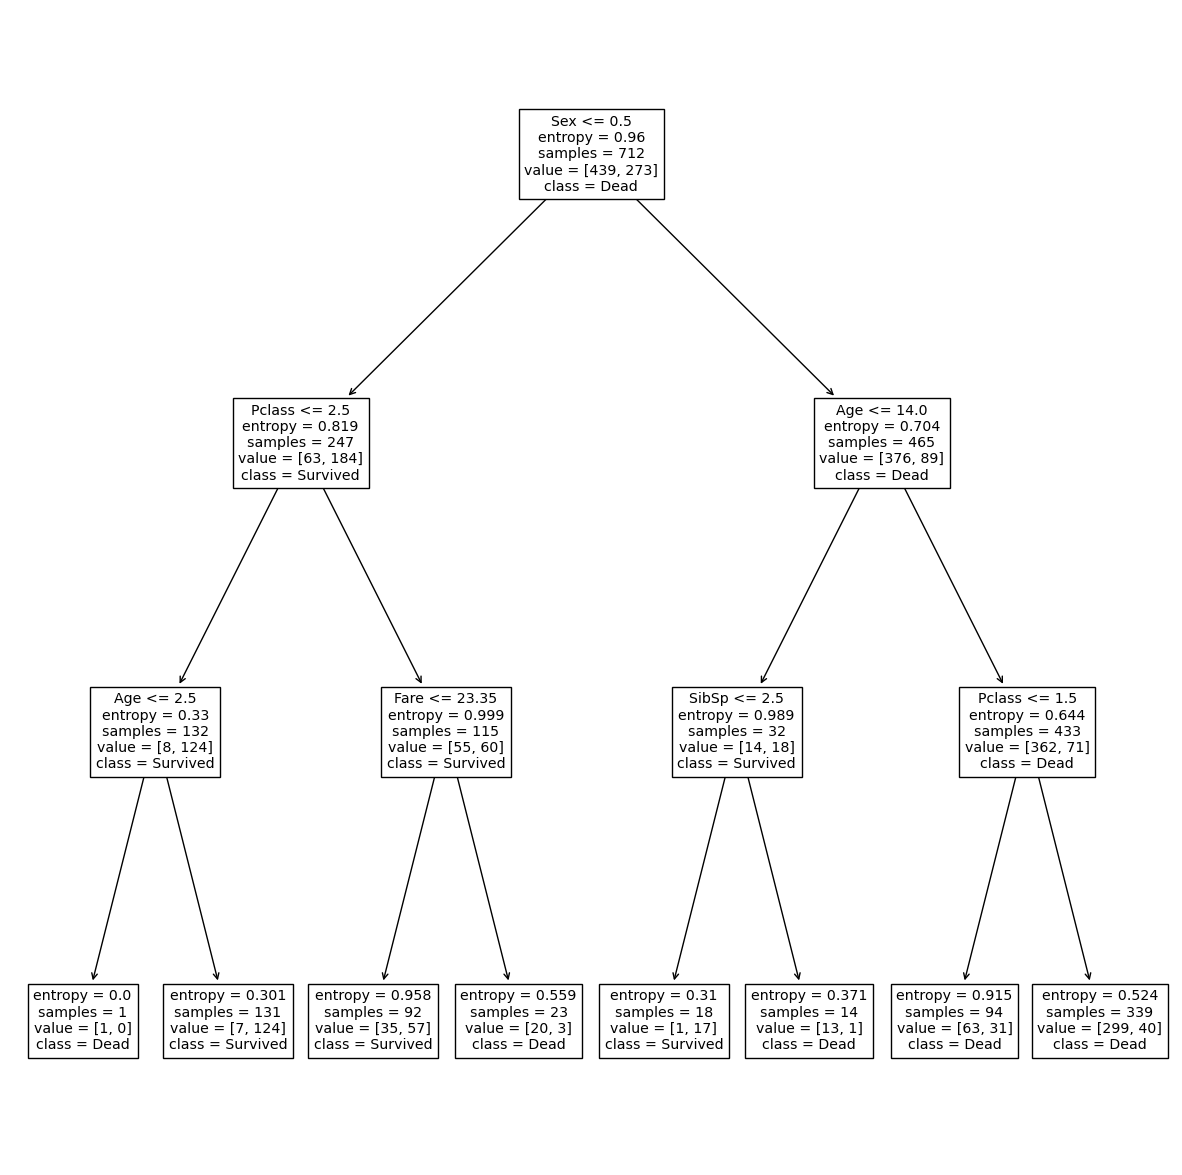

In [111]:
plt.figure(figsize = (15,15))
result = tree.plot_tree(model,feature_names=features,class_names=['Dead','Survived'])